# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions. 
# Q2. Load the Wine Quality dataset and explore its dimensions. Dataset link: 
# Q3. Check for null values, identify categorical variables, and encode them. 
# Q4. Separate the features and target variables from the dataset. 
# Q5. Perform a train-test split, dividing the data into training, validation, and test datasets. 
# Q6. Scale the dataset using an appropriate scaling technique. 
# Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables. 
# Q8. Create a Sequential model in Keras and add the previously designed layers to it. 
# Q9. Print the summary of the model architecture. 
# Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model. 
# Q11. Compile the model with the specified loss function, optimizer, and metrics. 
# Q12. Fit the model to the training data using appropriate batch size and number of epochs. 
# Q13. Obtain the model's parameters (weights and biases). 
# Q14. Store the model's training history as a Pandas DataFrame. 
# Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques. 
# Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,minmax_scale,LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [3]:
# Checking version of Tensorflow and Keras
print(f"Tensorflow Version {tf.__version__}")
#print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.15.0


## GPU / CPU Check

In [4]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU isn't available!
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [5]:
df = pd.read_csv("wine.csv")

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [10]:
# shape of the dataset
df.shape

(1599, 12)

In [11]:
#list down all columns
list(df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [12]:
#dropping duplcates records
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,bad
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,bad
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,bad
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,bad
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,bad
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,bad
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,bad


In [13]:
df = df.drop_duplicates()

In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
encoder = LabelEncoder()

In [16]:
encoded_quality = encoder.fit_transform(df['quality'])

In [17]:
df = df.drop(['quality'],axis = 1)

In [18]:
df['quality'] = encoded_quality

In [19]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


<AxesSubplot: >

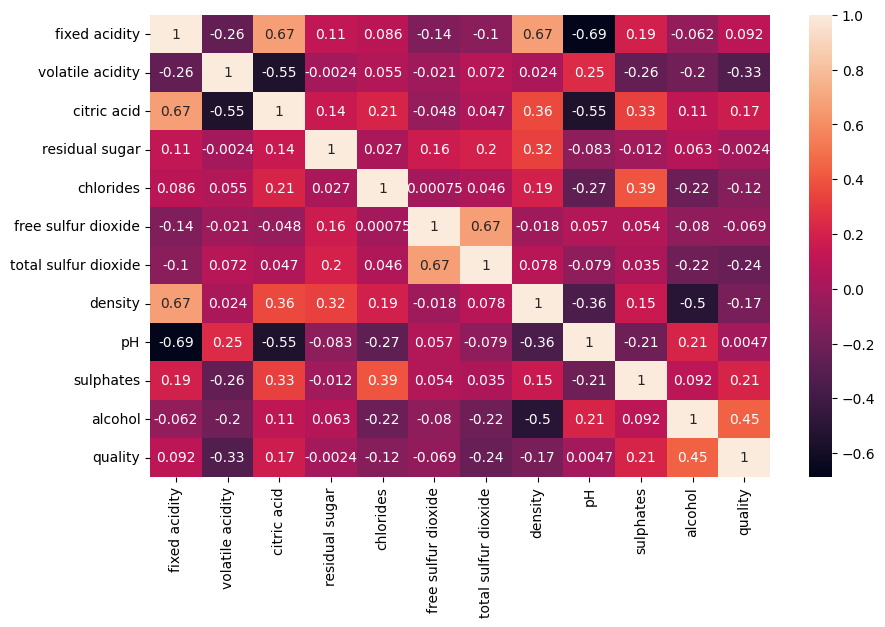

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True)

In [21]:
df.corr()['quality']

fixed acidity           0.091761
volatile acidity       -0.327195
citric acid             0.167903
residual sugar         -0.002371
chlorides              -0.115071
free sulfur dioxide    -0.069207
total sulfur dioxide   -0.235046
density                -0.168958
pH                      0.004693
sulphates               0.211365
alcohol                 0.446176
quality                 1.000000
Name: quality, dtype: float64

# Observation
quality feature is higlhy correlated with alcohol,sulphates,citric acid

In [22]:
X = df.drop(['quality'],axis = 1)

In [23]:
y = df['quality']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [25]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.20,random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(869, 11)
(272, 11)
(218, 11)
(869,)
(272,)
(218,)


In [27]:
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [29]:
model = Sequential()

In [30]:
model.add(Dense(18,activation='relu',input_dim=11,kernel_regularizer=tf.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(Dense(12,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                216       
                                                                 
 dense_1 (Dense)             (None, 12)                228       
                                                                 
 batch_normalization (Batch  (None, 12)                48        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 batch_normalization_1 (Bat  (None, 8)                 32        
 chNormalization)                                       

In [32]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001)
model.compile(optimizer= 'adam', loss= 'binary_crossentropy',metrics = ['accuracy'])

In [33]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

CALLBACKS = [checkpoint_cb, early_stopping_cb]

history = model.fit( X_train, y_train, epochs= 50,batch_size = 100,validation_data=(X_val, y_val), callbacks = CALLBACKS)


Epoch 1/50


9/9 [==============================] - 2s 37ms/step - loss: 0.9353 - accuracy: 0.4545 - val_loss: 0.8288 - val_accuracy: 0.5413
Epoch 2/50
1/9 [==>...........................] - ETA: 0s - loss: 0.8766 - accuracy: 0.5100

C:\Users\getan\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 14ms/step - loss: 0.8437 - accuracy: 0.5109 - val_loss: 0.7997 - val_accuracy: 0.5780
Epoch 3/50
9/9 [==============================] - 0s 11ms/step - loss: 0.8044 - accuracy: 0.5616 - val_loss: 0.7768 - val_accuracy: 0.6055
Epoch 4/50
9/9 [==============================] - 0s 12ms/step - loss: 0.7928 - accuracy: 0.5708 - val_loss: 0.7553 - val_accuracy: 0.6193
Epoch 5/50
9/9 [==============================] - 0s 10ms/step - loss: 0.7552 - accuracy: 0.6133 - val_loss: 0.7338 - val_accuracy: 0.6789
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 0.7461 - accuracy: 0.6191 - val_loss: 0.7146 - val_accuracy: 0.6835
Epoch 7/50
9/9 [==============================] - 0s 11ms/step - loss: 0.7307 - accuracy: 0.6214 - val_loss: 0.6989 - val_accuracy: 0.6697
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.7153 - accuracy: 0.6318 - val_loss: 0.6844 - val_accuracy: 0.6789
Epoch 9/50
9/9 [======================

In [34]:
model.layers[0].get_weights()

[array([[ 0.4287288 , -0.06565683,  0.30489776,  0.03027359, -0.5360013 ,
          0.362631  , -0.13953696, -0.09517667, -0.22853412,  0.24758713,
         -0.4529183 , -0.21014754, -0.64460194,  0.43253544,  0.31482834,
         -0.3455924 , -0.7572083 ,  0.45737457],
        [-0.1162535 ,  1.0104414 , -0.93956286,  0.15771393,  0.5394173 ,
          0.4354816 , -0.11159325, -0.54516774,  0.34880704, -0.6806677 ,
         -0.4419458 , -0.21614407, -0.5178325 ,  0.3760736 ,  0.14108795,
          0.40872097, -0.449905  , -0.5357143 ],
        [ 0.64778394,  0.08905962,  0.2651431 , -0.21137552, -0.11531091,
          0.7167867 ,  0.7230124 ,  0.11600585, -0.24347511, -0.2780575 ,
         -0.5024349 , -0.17451909,  0.02019829, -0.29011166,  0.38929075,
         -0.5678228 ,  0.00337656, -0.5090251 ],
        [-0.6491598 , -0.4782732 , -0.36370844,  0.1316802 , -0.7839218 ,
          0.42905113, -0.37356555,  0.21155933,  0.5285594 , -0.06260261,
         -0.30102208, -0.1236586 ,  0.2

In [35]:
bias_first_layer = model.layers[0].get_weights()[1]
bias_first_layer

array([-0.10365604,  0.03928895,  0.10962453,  0.01801955, -0.08591348,
       -0.00560702,  0.0956679 ,  0.10635924, -0.03616153, -0.01186358,
        0.08658271,  0.00853118, -0.10007558,  0.09225263, -0.09117672,
        0.0371555 ,  0.07194079,  0.21824507], dtype=float32)

In [36]:
y_log = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [37]:
y_pred = np.where(y_log>0.5,1,0)

In [38]:
accuracy_score(y_test,y_pred)

0.7279411764705882

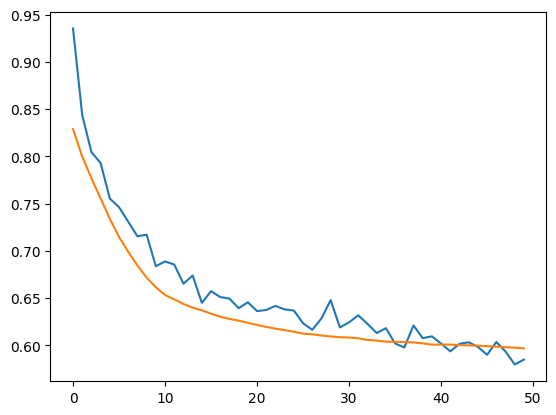

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

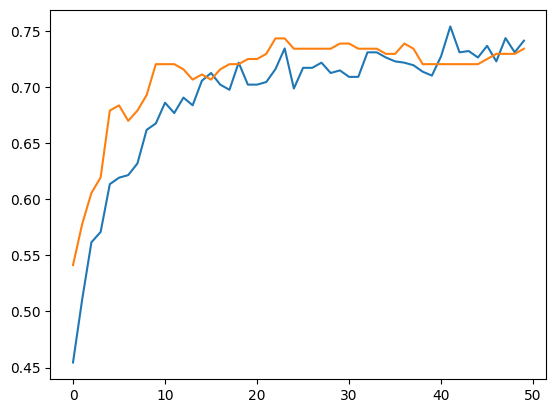

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

<AxesSubplot: >

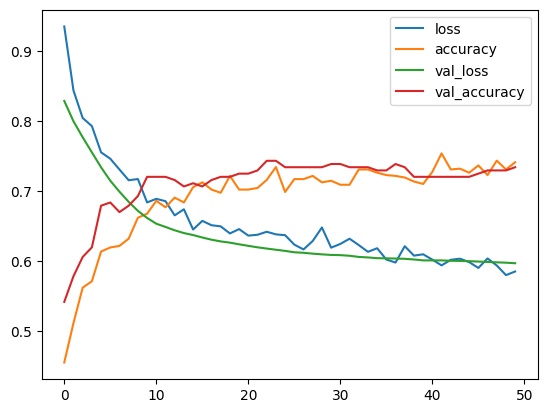

In [41]:
pd.DataFrame(history.history).plot()